## Welcome to Dask tutorial Session in Domino!

Notebook, Dask-Quick-Start-Tutorial.ipynb aims to benchmark training under two condistion for the same problem:
1. Train the model without Dask
2. Train the model using Dask on the on-demand-clusters (using dask workers and schedulers directly)

### What to expect from this:
- We should expect expect the following benchmarks:
1. Training without using Dask: 45s
3. Training with Dask on On-demand worker node: 13s

### example source: 
1. https://examples.dask.org/machine-learning.html


# ------------------------------------------------------------

# Let's get started WITHOUT Dask

This example covers a training method using  K-mean Cluster

In [1]:
from sklearn import cluster
import time
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

Total training time: 44.9 s


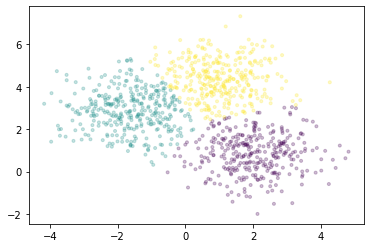

In [2]:
X, y = datasets.make_blobs(n_samples=10000000,
                                   #chunks=1000000,
                                   random_state=0,
                                   centers=3)

t0 = time.time()
km = cluster.KMeans(n_clusters=3)
km.fit(X)
t1 = time.time()

total1 = t1-t0

print(f"Total training time: {round(total1,1)} s")

fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

# ------------------------------------------------------------

# DASK Running on Domino On-demand Clusters

## Dask for Machine Learning

This is a high-level overview demonstrating some the components of Dask-ML.
Visit the main [Dask-ML](http://ml.dask.org) documentation, see the [dask tutorial](https://github.com/dask/dask-tutorial) notebook 08, or explore some of the other machine-learning examples.

[example source](https://examples.dask.org/machine-learning.html)

In [3]:
from dask.distributed import Client
import os
service_host = os.environ["DASK_SCHEDULER_SERVICE_HOST"]

# you should now be connected to the cluster
# Dashboard link from the client object is clickable but will not route in Domino
# Use the embedded Dask Web UI tab instead
service_port = os.environ["DASK_SCHEDULER_SERVICE_PORT"]
client = Client(address=f"{service_host}:{service_port}")
client

<Client: 'tcp://10.0.43.134:8786' processes=5 threads=5, memory=20.00 GiB>

Total training time: 13.2 s


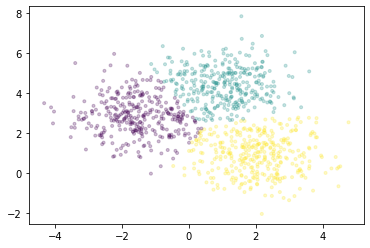

In [4]:
#from sklearn.datasets import make_classification
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
#import pandas as pd
import dask_ml.datasets
import dask_ml.cluster
import time
import matplotlib.pyplot as plt
%matplotlib inline

X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)

X = X.persist()
#X

t0 = time.time()
km = dask_ml.cluster.KMeans(init='k-means||', n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)
t1 = time.time()

total3 = t1-t0

print(f"Total training time: {round(total3,1)} s")


fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

For all the estimators implemented in Dask-ML, see the [API documentation](http://dask-ml.readthedocs.io/en/latest/modules/api.html).